# **Non-English Article Analysis Across Multiple Institutions**
## Exploring Publications in *OpenAlex*

This notebook provides insights into the linguistic landscape of Swiss research.

#### What is analyzed?
- The proportion of non-english articles published by each Swiss university in 2024.
- The distribution of each language in each institution.
- Comparisons between German-speaking and French-speaking Swiss universities in terms of language counts and diversity of non-English articles.

#### Why is this analysis interesting?
- Switzerland is a multilingual country with German, French, and Italian as official languages. Understanding the language distribution in academic publishing reveals how multilingualism is reflected in research outputs.
- English dominates scientific publishing, but non-English articles are crucial for local impact, and knowledge dissemination / accessibility within specific linguistic communities.
- It's interesting to compare language use across institutions and linguistic regions.

#### What can be observed?
- In the stacked bar charts we see that most of the non-english language articles from Swiss universities are in the local language. 
- The last visualization allows us to observe that the proportion of non-English articles is much lower in technical universities (ETH Zurich, EPFL) than in other universities.
- English remains the dominant language, but a notable fraction of research is published in other languages, reflecting Switzerland's linguistic diversity.

### Setup
#### Imports

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from open_colors import colors
from swiss_universities import swiss_unis
import textwrap

#### Response Validation

In [2]:
def validate_response(response):
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code} - {response.text}")
        return {"group_by": [], "results": []}

## Analysis: Proportion of Articles attributed to languages other than English across multiple institutions
### Here we analyze the distribution in Swiss Universities for the year 2024

### Step 1: Fetch all English Articles
Fetch the count of English articles for a specific institution.

In [3]:
def fetch_english_articles(institution_id):
    url = (
        f"https://api.openalex.org/works?filter=authorships.institutions.lineage:{institution_id},publication_year:2024,language:languages/en&group_by=language"
    )
    response = requests.get(url)
    data = validate_response(response)
    
    # Sum up the counts for all English articles
    en_counts = sum(item["count"] for item in data.get("group_by", []))
    return en_counts

### Step 2: Fetch Total Number of Articles
Fetch total article counts by language for a specific institution.

In [4]:
def fetch_total_articles_by_language(institution_id):
    url = (
        f"https://api.openalex.org/works?filter=authorships.institutions.lineage:{institution_id},publication_year:2024&group_by=language"
    )
    response = requests.get(url)
    data = validate_response(response)

    lang_counts = {item["key"]: item["count"] for item in data.get("group_by", [])}
    
    return lang_counts

### Step 3: Create DataFrame and Compute Statistics

In [5]:
# Fetch language distribution for all universities
language_data = {name: fetch_total_articles_by_language(inst_id) for name, inst_id in swiss_unis.items()}

# Compute statistics
df_data = []

for name, lang_counts in language_data.items():
    # Total articles across all languages
    total_articles = sum(lang_counts.values())  
    # Get English count from dictionary
    english_articles = lang_counts.get("https://openalex.org/languages/en", 0) 
    # Properly calculate non-English articles 
    non_english_articles = total_articles - english_articles  
    # Calculate the proportion of non-English articles
    proportion_non_en = non_english_articles / total_articles * 100 

    df_data.append({
        "Institution": name,
        "Total Articles (2024)": total_articles,
        "English Articles (2024)": english_articles,
        "Non-English Articles (2024)": non_english_articles,
        "Proportion Non-English": round(proportion_non_en, 4)
    })

df = pd.DataFrame(df_data)

#### Display DataFrame

In [6]:
df

,Institution,Total Articles (2024),English Articles (2024),Non-English Articles (2024),Proportion Non-English
0,ETH Zurich,9202,9081,121,1.3149
1,University of Zurich,8364,7975,389,4.6509
2,EPFL,5023,4927,96,1.9112
3,University of Bern,6898,6666,232,3.3633
4,University of Basel,4253,4103,150,3.5269
5,University of St. Gallen,782,709,73,9.3350
6,University of Lucerne,675,591,84,12.4444
7,University of Fribourg,1450,1260,190,13.1034
8,University of Lausanne,5345,4974,371,6.9411
9,University of Geneva,4475,4128,347,7.7542


#### Display total number of non-English articles across the institutions

In [7]:
total_non_english_articles = df["Non-English Articles (2024)"].sum()
print(f"Total Non-English Articles (2024): {total_non_english_articles}")

Total Non-English Articles (2024): 2119


### Step 4: Create DataFrame with counts per language

In [8]:
# Fetch language distribution for all universities
language_data = {name: fetch_total_articles_by_language(inst_id) for name, inst_id in swiss_unis.items()} 
language_data = pd.DataFrame(language_data)
# Fill NaN with 0 and convert to integers
language_data = language_data.fillna(0).astype(int)
# Extract institution names
language_data.index = [idx.split("/")[-1] for idx in language_data.index] 
language_data

,ETH Zurich,University of Zurich,EPFL,University of Bern,University of Basel,University of St. Gallen,University of Lucerne,University of Fribourg,University of Lausanne,University of Geneva,University of Neuchâtel,Università della Svizzera italiana
en,9081,7975,4927,6666,4103,709,591,1260,4974,4128,577,1148
de,54,270,4,153,114,73,74,76,52,16,2,0
lv,39,50,44,4,3,0,0,5,2,39,0,1
fr,11,39,30,44,16,0,2,94,293,265,42,3
es,3,13,2,19,9,0,2,8,15,10,7,1
pt,3,6,1,2,0,0,0,0,0,8,0,1
fi,2,0,0,0,1,0,0,0,0,0,0,1
uk,2,0,0,0,0,0,0,0,0,0,0,0
bn,1,0,0,0,0,0,0,0,0,0,0,0
ckb,1,1,0,2,0,0,0,0,0,1,0,0


### Step 5: Visualization 1 – Plot in a Stacked Bar Chart

Create a stacked bar chart to visualize the distribution of `language_data`. By removing the 'en' language counts from the data and categorizing the remaining languages into top 5 and others:

In [9]:
# Remove 'en' language counts
non_en_data = language_data.drop(index="en", errors="ignore")  

# Select top 5 languages (based on total article count)
top_languages = non_en_data.sum(axis=1).sort_values(ascending=False).head(5).index

# Other languages include all languages not in the top 5
other_languages = non_en_data.drop(index=top_languages, errors="ignore").sum(axis=0)
other_languages.name = "Other Languages"  # Set the name for the new row
language_categories = pd.concat([non_en_data.loc[top_languages], other_languages.to_frame().T])  # Concatenate into a DataFrame

# Transpose because we want languages as columns
language_categories_T = language_categories.T

#### Open Colors for Plot

In [10]:
# Define colors for each language
plot_colors = [colors["gray"][8], colors["teal"][9], colors["yellow"][5], colors["blue"][8], colors["orange"][6], colors["pink"][3]]
color_mapping = {language: plot_colors[i % len(plot_colors)] for i, language in enumerate(language_categories_T.columns)}

#### Separate Universities by local language
> Note: The distinction into "German-speaking" and "French-speaking" categories excludes the consideration of billingual universities.

In [11]:
german_speaking = [
    "ETH Zurich",
    "University of Zurich",
    "University of Bern",
    "University of Basel",
    "University of St. Gallen",
    "University of Lucerne"
]

french_speaking = [
    "EPFL",
    "University of Fribourg",
    "University of Lausanne",
    "University of Geneva",
    "University of Neuchâtel"
]

#### Filter and wrap labels each

In [12]:
# German-speaking
language_categories_T_german = language_categories_T.loc[language_categories_T.index.isin(german_speaking)] 
wrapped_labels_german = [textwrap.fill(label, width=10) for label in language_categories_T_german.index] 

# French-speaking
language_categories_T_french = language_categories_T.loc[language_categories_T.index.isin(french_speaking)]
wrapped_labels_french = [textwrap.fill(label, width=10) for label in language_categories_T_french.index]

#### Create two separate DataFrames

In [13]:
df_german = df[df["Institution"].isin(german_speaking)]
wrapped_labels_german_df = [textwrap.fill(label, width=10) for label in df_german["Institution"]] 

df_french = df[df["Institution"].isin(french_speaking)]
wrapped_labels_french_df = [textwrap.fill(label, width=10) for label in df_french["Institution"]]

#### Plot German-Speaking Universities' Language Distribution

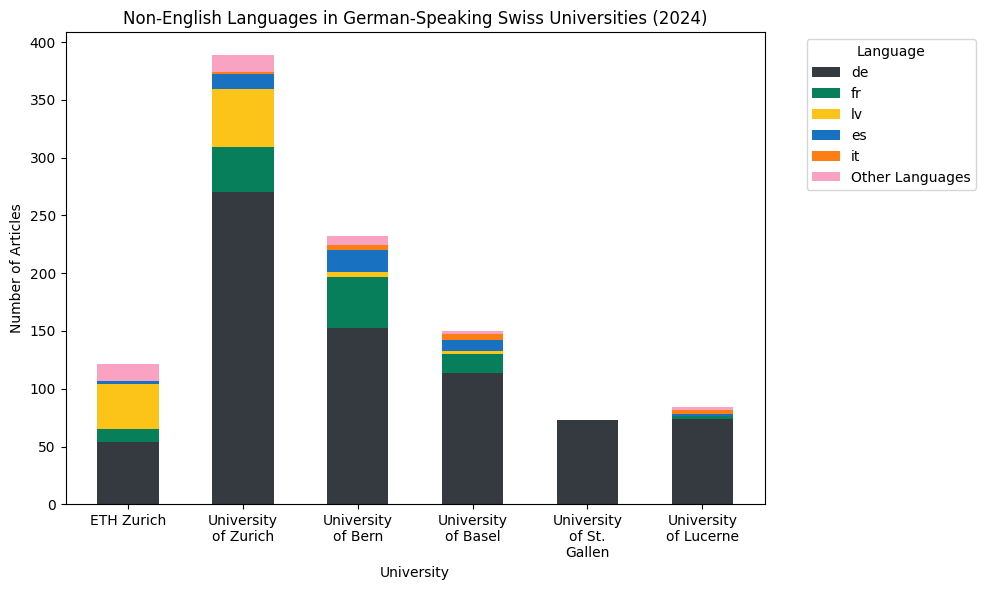

In [14]:
# Adjust bar positions and width
bar_width = 0.8
bar_positions = np.arange(len(language_categories_T_german)) * 1.5

fig, ax = plt.subplots(figsize=(10, 6))
bottoms = np.zeros(len(language_categories_T_german))
for language in language_categories_T_german.columns:
    ax.bar(
        bar_positions,
        language_categories_T_german[language],
        width=bar_width,
        label=language,
        bottom=bottoms,
        color=color_mapping[language]
    )
    bottoms += language_categories_T_german[language]

ax.set_ylabel("Number of Articles")
ax.set_xlabel("University")
ax.set_title("Non-English Languages in German-Speaking Swiss Universities (2024)")
ax.legend(title="Language", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(ticks=bar_positions, labels=wrapped_labels_german, ha="center")
plt.tight_layout()
plt.show()

#### Plot French-Speaking Universities' Language Distribution

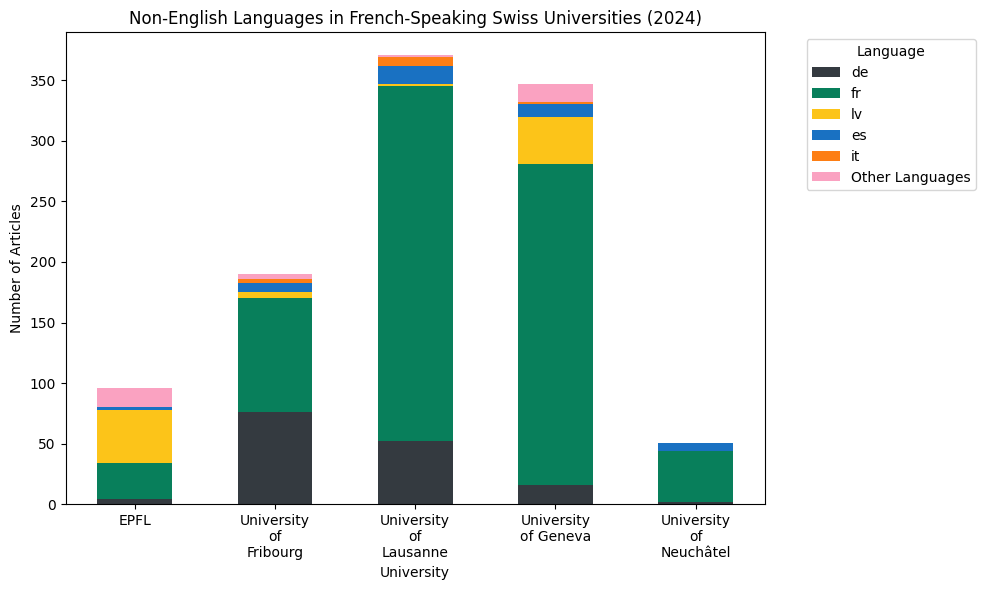

In [15]:
# Adjust bar positions and width
bar_width = 0.8
bar_positions = np.arange(len(language_categories_T_french)) * 1.5

fig, ax = plt.subplots(figsize=(10, 6))
bottoms = np.zeros(len(language_categories_T_french))
for language in language_categories_T_german.columns:
    ax.bar(
        bar_positions,
        language_categories_T_french[language],
        width=bar_width,
        label=language,
        bottom=bottoms,
        color=color_mapping[language]
    )
    bottoms += language_categories_T_french[language]

ax.set_ylabel("Number of Articles")
ax.set_xlabel("University")
ax.set_title("Non-English Languages in French-Speaking Swiss Universities (2024)")
ax.legend(title="Language", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(ticks=bar_positions, labels=wrapped_labels_french, ha="center")
plt.tight_layout()
plt.show()

### Step 6: Visualization 2 – Proportion of Non-English Articles by Institution
Color-coded points by German-speaking vs. French-speaking universities

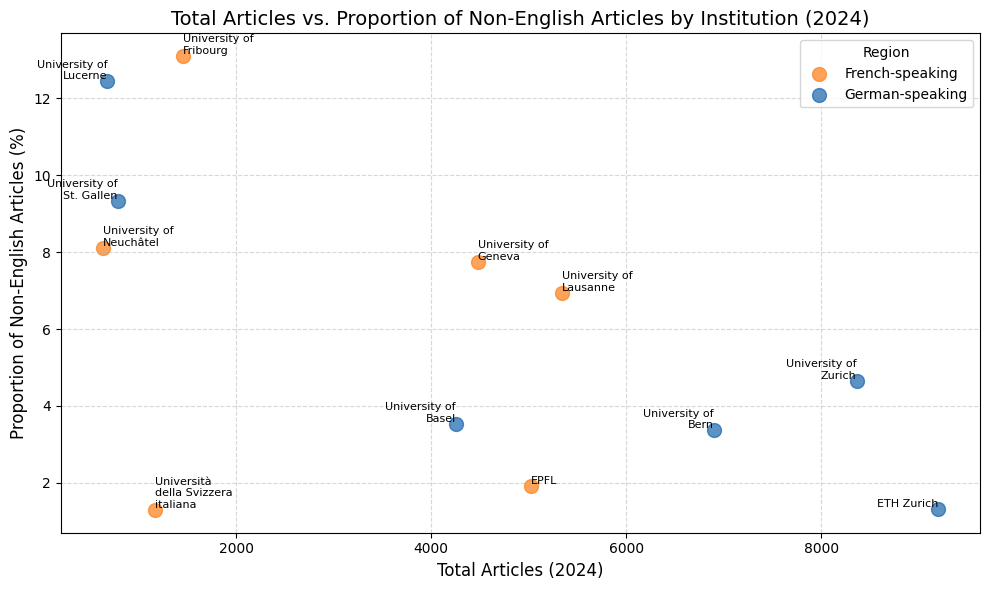

In [16]:
# Add a 'Region' column to df for grouping
df['Region'] = df['Institution'].apply(lambda x: 'German-speaking' if x in german_speaking else 'French-speaking')

# Visualization 3: Scatter Plot - Total Articles vs. Proportion Non-English
fig, ax = plt.subplots(figsize=(10, 6))
colors_region = {'German-speaking': colors['blue'][9], 'French-speaking': colors['orange'][6]}
for region, group in df.groupby('Region'):
    ax.scatter(group['Total Articles (2024)'], group['Proportion Non-English'], 
               color=colors_region[region], label=region, s=100, alpha=0.7)

ax.set_xlabel('Total Articles (2024)', fontsize=12)
ax.set_ylabel('Proportion of Non-English Articles (%)', fontsize=12)
ax.set_title('Total Articles vs. Proportion of Non-English Articles by Institution (2024)', fontsize=14)
ax.legend(title='Region')
#name the data points, should stay in the frame
# use textwrap to wrap long institution names
for i, row in df.iterrows():
    ax.text(row['Total Articles (2024)'], row['Proportion Non-English'], 
            textwrap.fill(row['Institution'], width=15), fontsize=8,
            ha='right' if row['Region'] == 'German-speaking' else 'left',
            va='bottom')
    
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
